In [3]:
import models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf
from sklearn.metrics import mean_squared_error
import models

In [13]:
lags = [1,2,3,4,5,6,7]

ipca = models.predict_ipca(True,lags)
cambio = models.predict_cambio(True,lags)
selic = models.predict_selic(True,lags)
energy = models.predict_energy_production(True,lags)

2023-01-30 14:47:36 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 216 samples.
2023-01-30 14:47:36 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2023-01-30 14:47:36 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2023-01-30 14:47:36 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2023-01-30 14:47:36 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2023-01-30 14:47:36 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2023-01-30 14:48:35 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 192 samples.
2023-01-30 14:48:35 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2023-01-30 14:48:35 pytorch_lightning.utilities.rank_zero INFO: GPU available: False, used: False
2023-01-30 

In [19]:
for i in lags:
    ipca[i]['res'] = ipca[i]['prediction'] - ipca[i]['indice']
    cambio[i]['res'] = cambio[i]['prediction'] - cambio[i]['cambio']
    selic[i]['res'] = selic[i]['prediction'] - selic[i]['selic']
    energy[i]['res'] = energy[i]['prediction'] - energy[i]['hydroeletric']

## IPCA

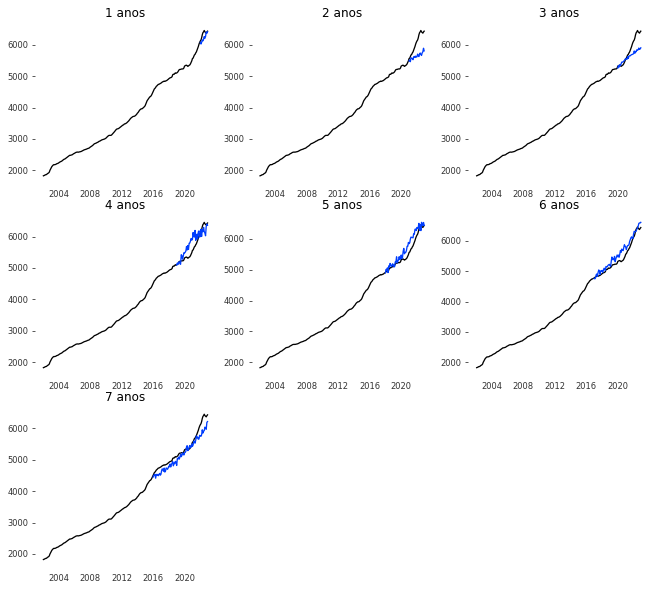

In [22]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags:
    plt.subplot(3,3,i)
    _ = plt.plot(ipca[i].index,ipca[i]['indice'])
    _ = plt.plot(ipca[i].index,ipca[i]['prediction'])
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

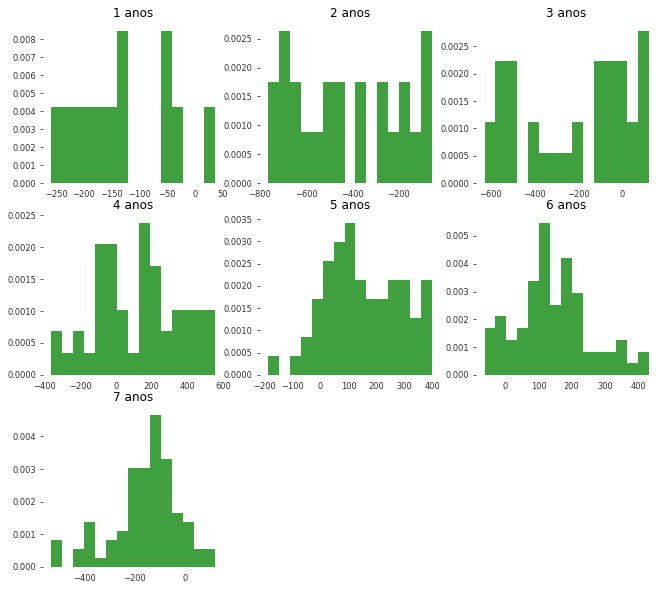

In [23]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags:
    plt.subplot(3,3,i)
    _ = plt.hist(ipca[i]['res'], 15, density=True, facecolor='g', alpha=0.75)
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

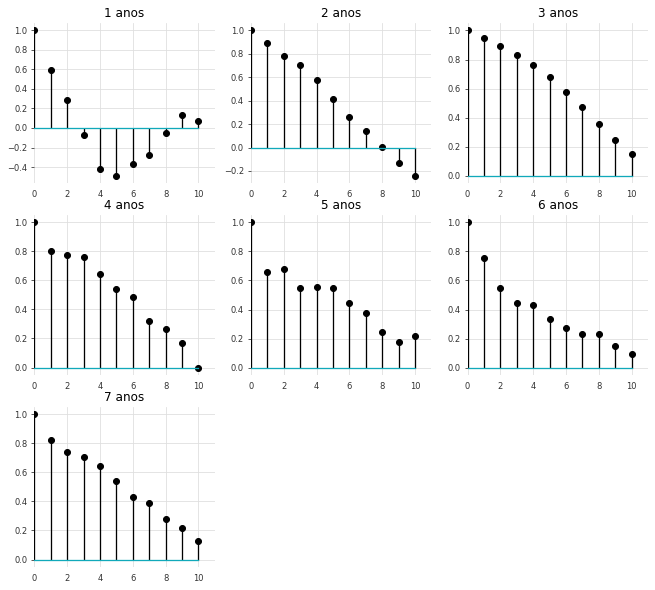

In [24]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags:
    plt.subplot(3,3,i)
    autocorr = acf(ipca[i]['res'].dropna(),nlags = 10)
    lg = range(0,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

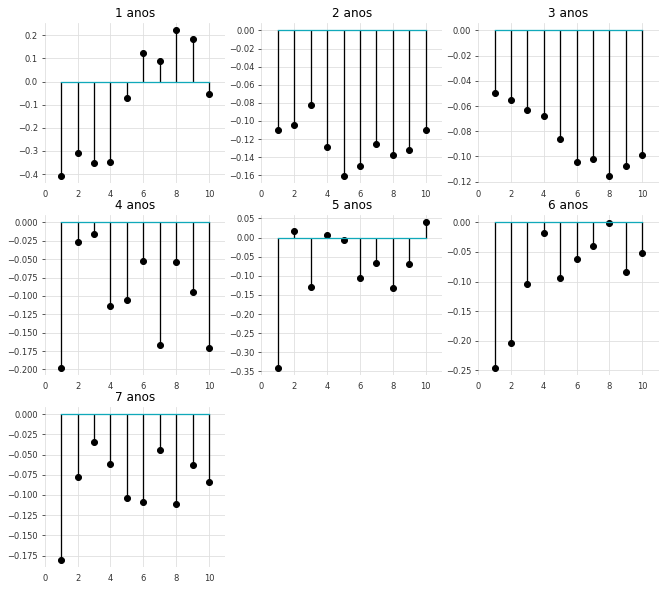

In [25]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags:
    plt.subplot(3,3,i)
    autocorr = np.diff(acf(ipca[i]['res'].dropna(),nlags = 10))
    lg = range(1,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

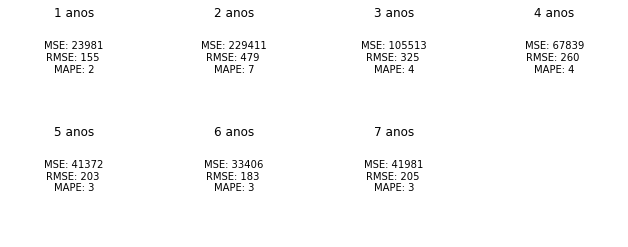

In [26]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(4)
for i in lags:
    data = ipca[i].dropna()
    mse = round(mean_squared_error(data['indice'],data['prediction']))
    rmse = round(mean_squared_error(data['indice'],data['prediction'],squared = False))
    mape = round(np.mean(np.abs((data['indice']- data['prediction'])/data['indice']))*100)
    plt.subplot(2,4,i)
    _ = plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse} \nMAPE: {mape}',ha = 'center')
    plt.title(f'{i} anos')
    plt.grid(False)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])
    plt.gca().xaxis.set_ticks_position('none') 
    plt.gca().yaxis.set_ticks_position('none')
plt.show()

## Câmbio

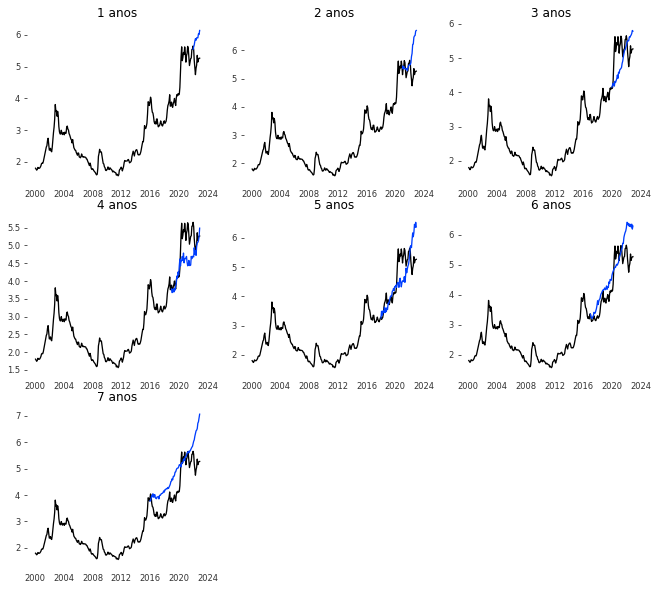

In [30]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags:
    plt.subplot(3,3,i)
    _ = plt.plot(cambio[i].index,cambio[i]['cambio'])
    _ = plt.plot(cambio[i].index,cambio[i]['prediction'])
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

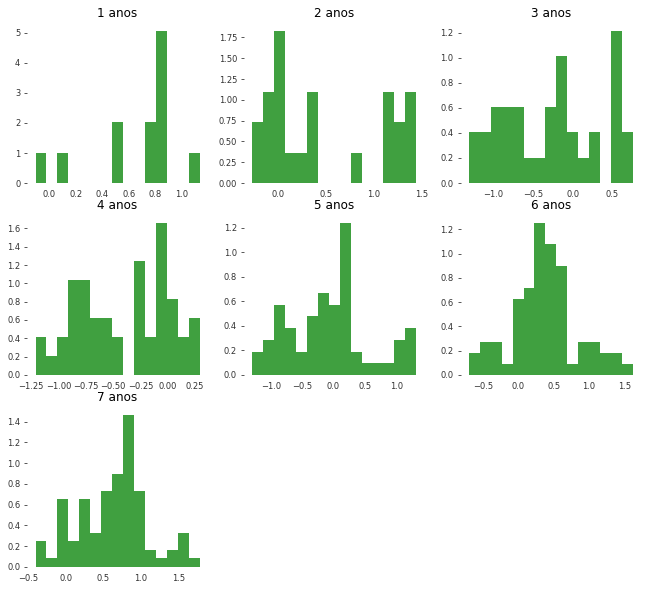

In [31]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags:
    plt.subplot(3,3,i)
    n, bins, patches = plt.hist(cambio[i]['res'], 15, density=True, facecolor='g', alpha=0.75)
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

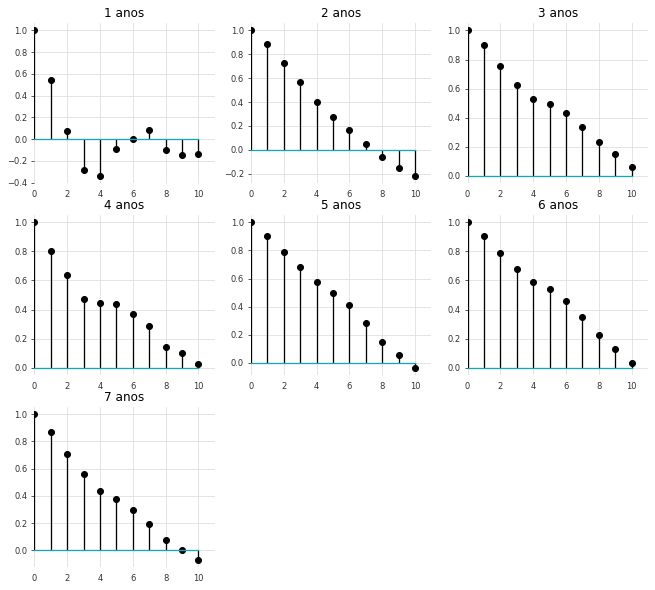

In [32]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags:
    plt.subplot(3,3,i)
    autocorr = acf(cambio[i]['res'].dropna(),nlags = 10)
    lg = range(0,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

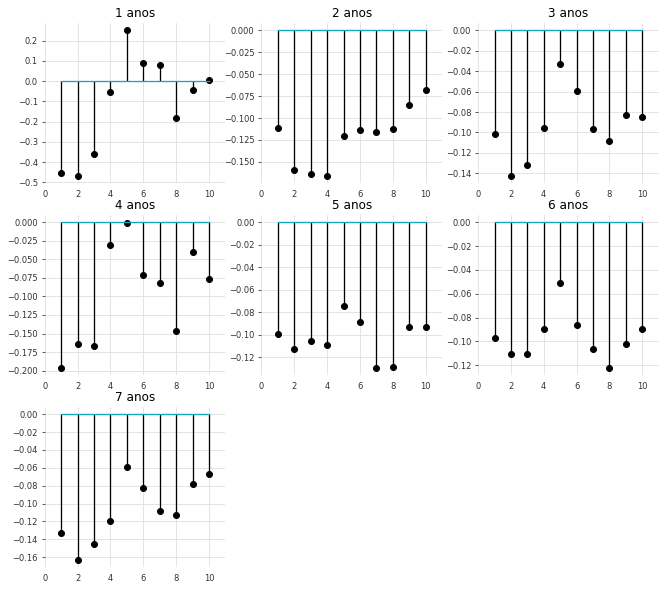

In [33]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags:
    plt.subplot(3,3,i)
    autocorr = np.diff(acf(cambio[i]['res'].dropna(),nlags = 10))
    lg = range(1,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

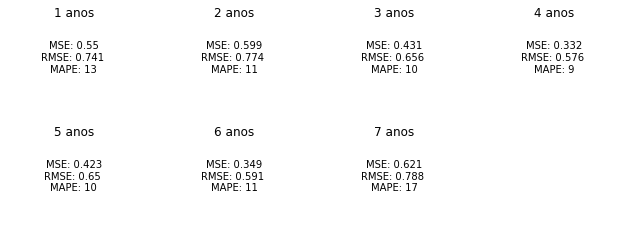

In [34]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(4)
for i in lags:
    data = cambio[i].dropna()
    mse = round(mean_squared_error(data['cambio'],data['prediction']),3)
    rmse = round(mean_squared_error(data['cambio'],data['prediction'],squared = False),3)
    mape = round(np.mean(np.abs((data['cambio']- data['prediction'])/data['cambio']))*100)
    plt.subplot(2,4,i)
    _ = plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse} \nMAPE: {mape}',ha = 'center')
    plt.title(f'{i} anos')
    plt.grid(False)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])
    plt.gca().xaxis.set_ticks_position('none') 
    plt.gca().yaxis.set_ticks_position('none')
plt.show()

## SELIC

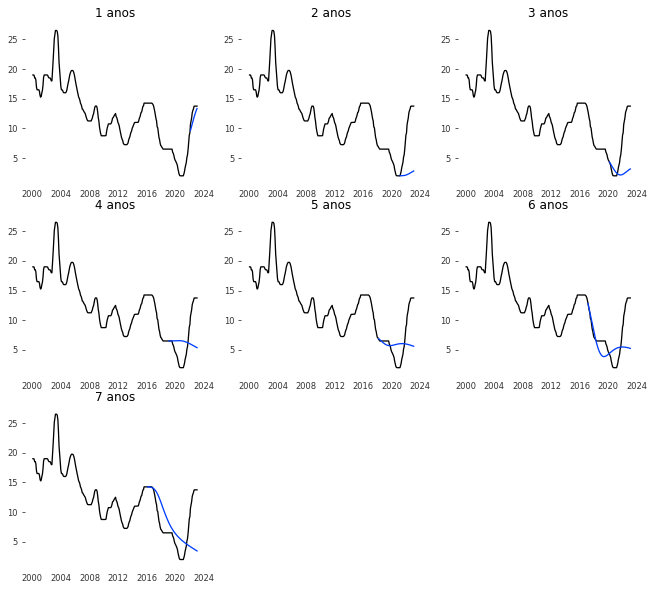

In [35]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags:
    plt.subplot(3,3,i)
    _ = plt.plot(selic[i].index,selic[i]['selic'])
    _ = plt.plot(selic[i].index,selic[i]['prediction'])
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

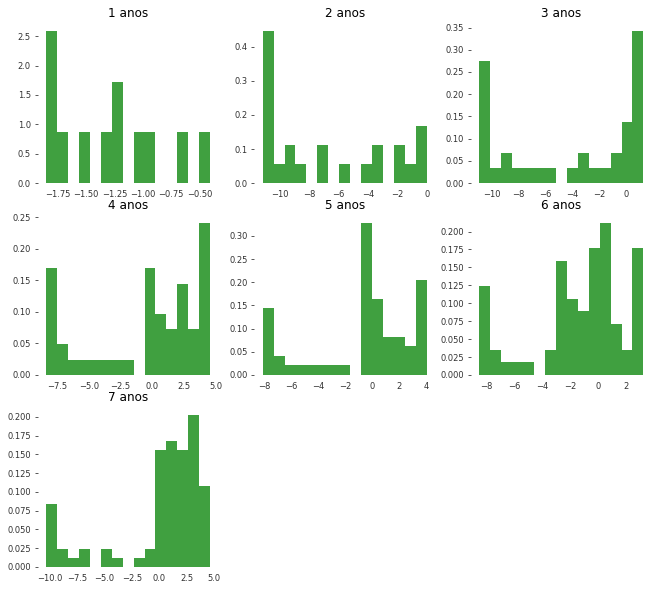

In [36]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    n, bins, patches = plt.hist(selic[i]['res'], 15, density=True, facecolor='g', alpha=0.75)
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

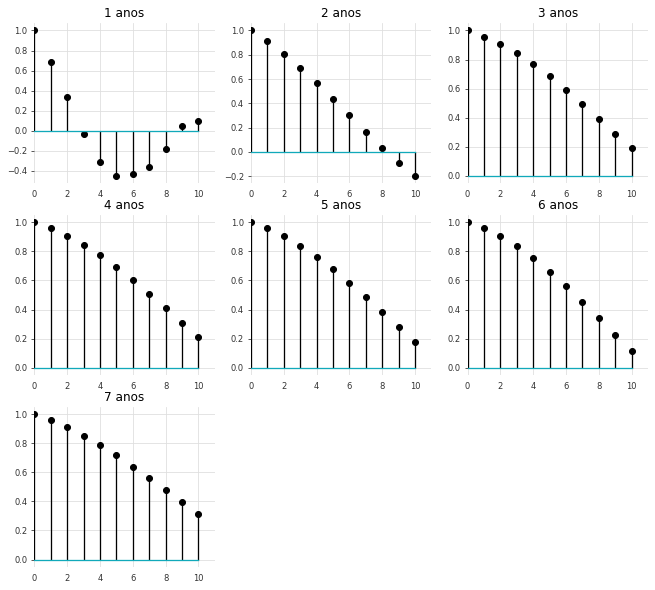

In [37]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags:
    plt.subplot(3,3,i)
    autocorr = acf(selic[i]['res'].dropna(),nlags = 10)
    lg = range(0,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

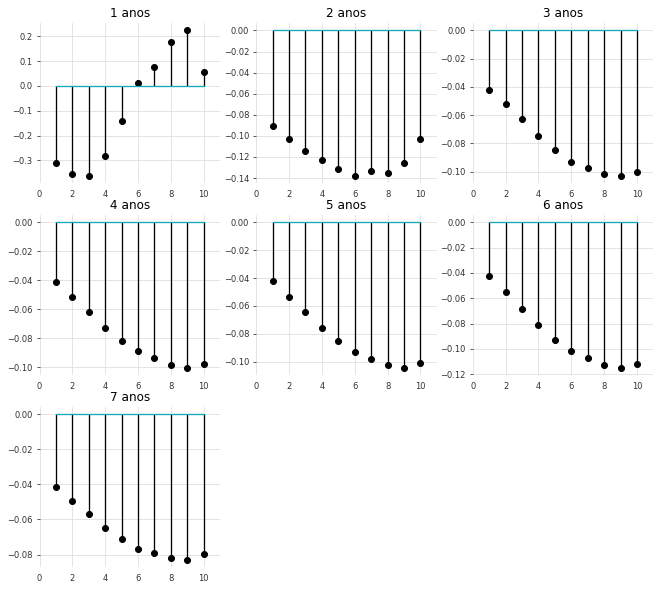

In [38]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags:
    plt.subplot(3,3,i)
    autocorr = np.diff(acf(selic[i]['res'].dropna(),nlags = 10))
    lg = range(1,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

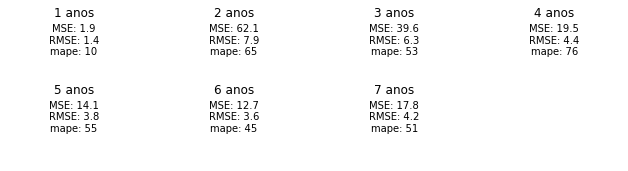

In [39]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(4)
for i in lags:
    data = selic[i].dropna()
    mse = round(mean_squared_error(data['selic'],data['prediction']),1)
    rmse = round(mean_squared_error(data['selic'],data['prediction'],squared = False),1)
    mape = round(np.mean(np.abs((data['selic'] - data['prediction'])/data['selic']))*100)
    plt.subplot(3,4,i)
    _ = plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse}\nmape: {mape}',ha = 'center')
    plt.title(f'{i} anos')
    plt.grid(False)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])
    plt.gca().xaxis.set_ticks_position('none') 
    plt.gca().yaxis.set_ticks_position('none')
plt.show()

## Produção de Energia

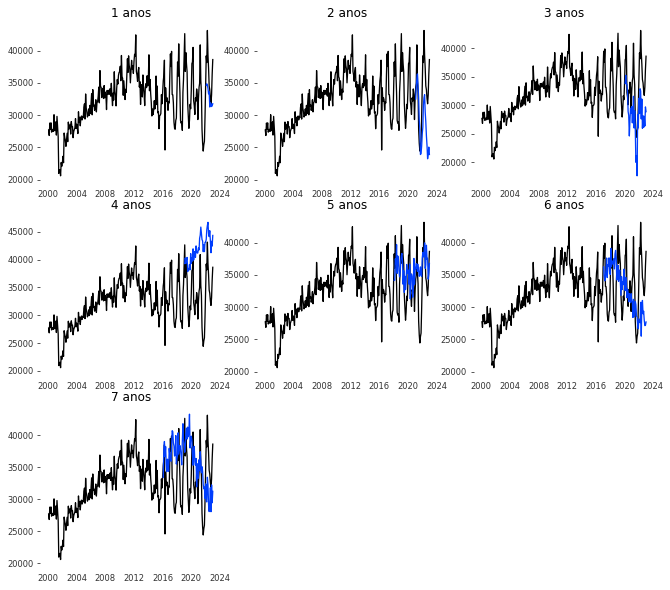

In [42]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags:
    plt.subplot(3,3,i)
    _ = plt.plot(energy[i].index,energy[i]['hydroeletric'])
    _ = plt.plot(energy[i].index,energy[i]['prediction'])
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

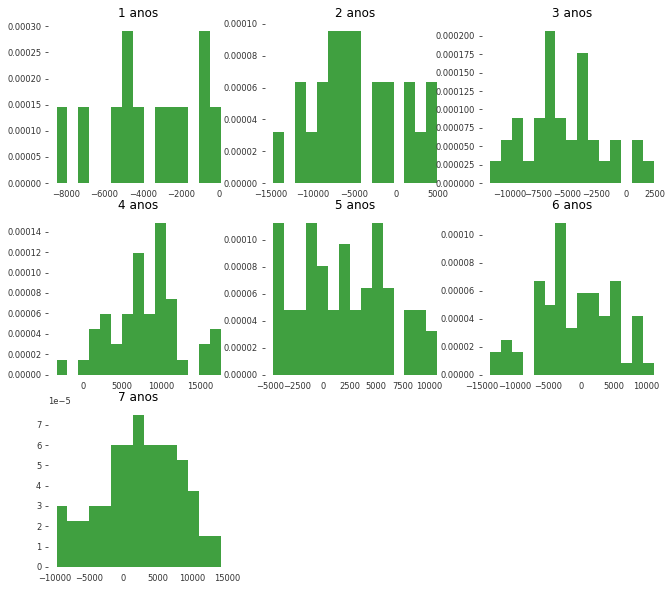

In [43]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in range(1,8):
    plt.subplot(3,3,i)
    n, bins, patches = plt.hist(energy[i]['res'], 15, density=True, facecolor='g', alpha=0.75)
    plt.title(f'{i} anos')
    plt.grid(False)
plt.show()

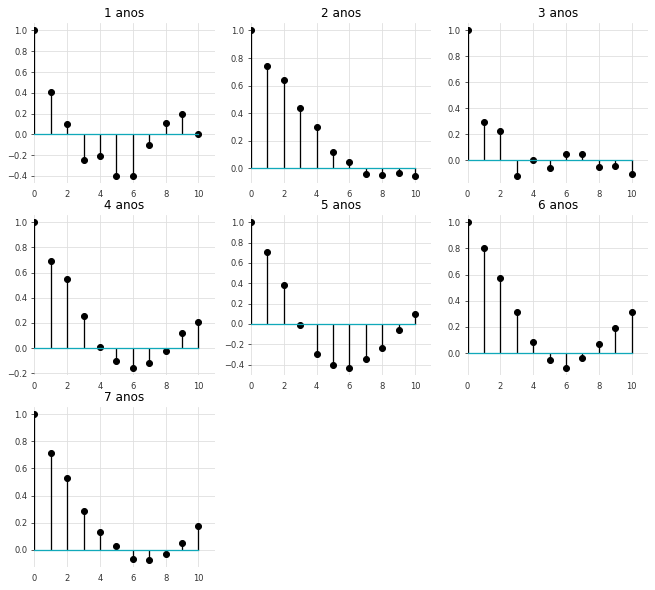

In [44]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags:
    plt.subplot(3,3,i)
    autocorr = acf(energy[i]['res'].dropna(),nlags = 10)
    lg = range(0,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

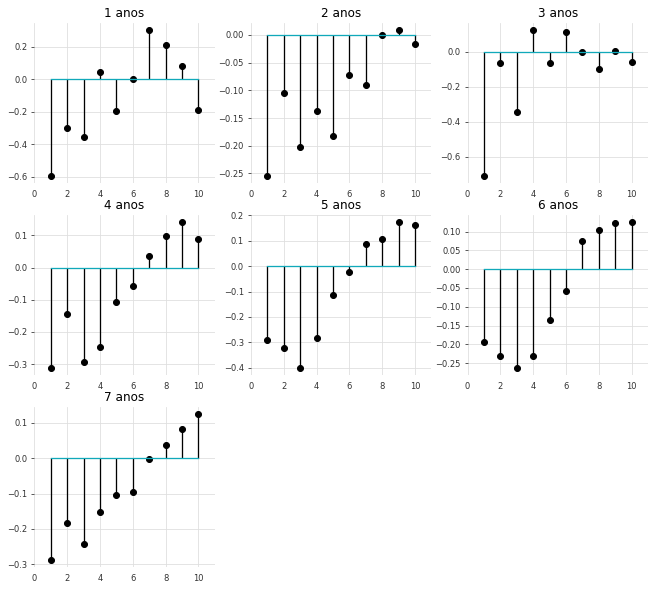

In [45]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(10)
for i in lags:
    plt.subplot(3,3,i)
    autocorr = np.diff(acf(energy[i]['res'].dropna(),nlags = 10))
    lg = range(1,11)
    plt.stem(lg,autocorr)
    plt.xlim([0,11])
    plt.title(f'{i} anos')
plt.show()

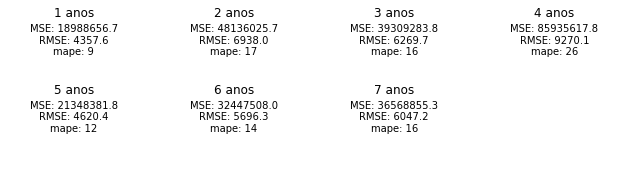

In [47]:
f = plt.figure()
f.set_figwidth(11)
f.set_figheight(4)
for i in lags:
    data = energy[i].dropna()
    mse = round(mean_squared_error(data['hydroeletric'],data['prediction']),1)
    rmse = round(mean_squared_error(data['hydroeletric'],data['prediction'],squared = False),1)
    mape = round(np.mean(np.abs((data['hydroeletric'] - data['prediction'])/data['hydroeletric']))*100)
    plt.subplot(3,4,i)
    _ = plt.text(0.5,0.5,f'MSE: {mse}\nRMSE: {rmse}\nmape: {mape}',ha = 'center')
    plt.title(f'{i} anos')
    plt.grid(False)
    plt.gca().xaxis.set_ticklabels([])
    plt.gca().yaxis.set_ticklabels([])
    plt.gca().xaxis.set_ticks_position('none') 
    plt.gca().yaxis.set_ticks_position('none')
plt.show()